### Hate Speech Detection wth own dataset

In [446]:
import pandas as pd
import numpy as np

In [447]:
dataset = pd.read_csv("speech.csv")
dataset[["class", "tweet"]]

,class,tweet
0,noHate,b'At least half of all humans are of below-ave...
1,noHate,b'Hail Imperium Europae !'
2,noHate,b'Is this normally what it should be ?'
3,noHate,b'Stay for Gel test .'
4,hate,"b""It's weird most Indians dot and to an extent..."
...,...,...
10698,noHate,b'If that number is correct then it is impress...
10699,noHate,b'Who TF cares ?'
10700,noHate,b'She too gets in trouble for speaking up .'
10701,noHate,b'The white nationalist front has never been p...


In [448]:
# ratio for hate speech to non hate speech is very low
print(dataset[dataset["class"]=="noHate"].shape)
print(dataset[dataset["class"]=="hate"].shape)

(9507, 3)
(1196, 3)


In [449]:
# populate dataset with duplicate entries of hate speech 
additional_data = dataset[dataset["class"]=='hate']
additional_data

,Unnamed: 0,tweet,class
4,4,"b""It's weird most Indians dot and to an extent...",hate
15,15,b'I know somebody who wants to perhaps move to...,hate
27,27,b'When ever I see these white children murdere...,hate
35,35,"b'They are no better than their daughters , th...",hate
54,54,"b'Oh, yes they will skin us alive if given the...",hate
...,...,...,...
10639,10639,"b""A mud is a mud is a mud that 's all there is...",hate
10659,10659,b'I bet you can see the Mexic-ants from space ...,hate
10661,10661,b'Well they have got to be more aware then the...,hate
10671,10671,"b""We all know that when their are too many eth...",hate


In [450]:
additional_data = dataset[dataset["class"]=='hate']
additional_data = pd.DataFrame(np.repeat(additional_data.values, 8, axis=0), columns=["Unnamed: 0", "tweet", "class"])
dataset = pd.concat([dataset, additional_data], axis=0, ignore_index=True)
dataset = dataset.sample(frac=1, ignore_index=True)

In [451]:
dataset.isnull().sum()

Unnamed: 0    0
tweet         0
class         0
dtype: int64

In [452]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20271 entries, 0 to 20270
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20271 non-null  object
 1   tweet       20271 non-null  object
 2   class       20271 non-null  object
dtypes: object(3)
memory usage: 475.2+ KB


In [453]:
dataset.describe()

,Unnamed: 0,tweet,class
count,20271,20271,20271
unique,10703,10534,2
top,856,"b""Hell I 'd rather clean a dozen tiolets a day...",hate
freq,9,27,10764


In [454]:
dataset['labels'] = dataset['class'].map({'noHate': "No hate language",
                                          'hate': "Hate Speech"})
dataset

,Unnamed: 0,tweet,class,labels
0,856,b'They do it because they know it pisses the w...,hate,Hate Speech
1,6555,b'But what do you expect with a homosexual Mus...,hate,Hate Speech
2,8376,"b""http://www.wafb.com/Global/story.asp ? S = 1...",noHate,No hate language
3,9021,"b""Also I was born here so it is not easy to ``...",noHate,No hate language
4,858,b'I have a couple and get out on the 14th .',noHate,No hate language
...,...,...,...,...
20266,3540,"b""Her forehead sticks out her eyes are small a...",noHate,No hate language
20267,8483,b'**** off bulgar turkic peice of * * * * and ...,hate,Hate Speech
20268,885,b'I guess I should have known that there are t...,noHate,No hate language
20269,8402,"b""If you search around you can probably find `...",hate,Hate Speech


In [455]:
data = dataset[["tweet", "labels"]]
data

,tweet,labels
0,b'They do it because they know it pisses the w...,Hate Speech
1,b'But what do you expect with a homosexual Mus...,Hate Speech
2,"b""http://www.wafb.com/Global/story.asp ? S = 1...",No hate language
3,"b""Also I was born here so it is not easy to ``...",No hate language
4,b'I have a couple and get out on the 14th .',No hate language
...,...,...
20266,"b""Her forehead sticks out her eyes are small a...",No hate language
20267,b'**** off bulgar turkic peice of * * * * and ...,Hate Speech
20268,b'I guess I should have known that there are t...,No hate language
20269,"b""If you search around you can probably find `...",Hate Speech


In [456]:
import re
import nltk
# nltk.download('stopwords')
import string

In [457]:
# Removal of stop words and stemming of words
from nltk.corpus import stopwords
stpwords = set(stopwords.words("english"))
stemmer = nltk.SnowballStemmer("english")

In [458]:
# data cleaning
def clean_data(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.S+', '', text) # replacing links
    text = re.sub('\[.*?\]', '', text) # replacing any text in squre brackets
    text = re.sub('<.*?>', '', text) # replacing any text in '<', '>'
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    # stop words removal
    text = [word for word in text.split(" ") if word not in stpwords]
    text = " ".join(text)

    # stemming the text
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [459]:
data["tweet"] = data["tweet"].apply(clean_data)
data

C:\Users\mihir\AppData\Local\Temp\ipykernel_31156\1117457519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


,tweet,labels
0,bthey know piss white show disrespect peopl s...,Hate Speech
1,bbut expect homosexu muslim mayor,Hate Speech
2,b robinson alleg tri sell piec artilleri ...,No hate language
3,balso born easi go back,No hate language
4,bi coupl get,No hate language
...,...,...
20266,bher forehead stick eye small close togeth nos...,No hate language
20267,b bulgar turkic peic ustasha kosovo be...,Hate Speech
20268,bi guess known mani bleed heart liber nw get a...,No hate language
20269,bif search around probabl find hoax centuri ...,Hate Speech


In [460]:
X = np.array(data["tweet"])
y = np.array(data["labels"])
X

array(['bthey know piss white  show disrespect peopl show respect ',
       'bbut expect homosexu muslim mayor ',
       'b    robinson alleg tri sell  piec artilleri  hurle grew suspici call sheriff offic ',
       ..., 'bi guess known mani bleed heart liber nw get answer thread ',
       'bif search around probabl find  hoax  centuri  free net ',
       'btake look blog  exampl '], dtype=object)

In [461]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [462]:
cv = CountVectorizer()
X = cv.fit_transform(X)
X

<20271x12116 sparse matrix of type '<class 'numpy.int64'>'
	with 195213 stored elements in Compressed Sparse Row format>

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [464]:
# Building the ML model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [465]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[3551,    0],
       [ 374, 2765]], dtype=int64)

In [466]:
accuracy_score(y_test, y_pred)

0.9440956651718984

In [467]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

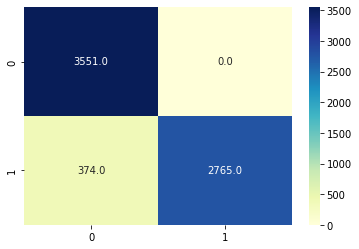

In [468]:
sns.heatmap(cm, annot = True, fmt='.1f', cmap='YlGnBu')

In [475]:
# testing on a simple example
sample = "European men and women are murdered by black people"
sample = clean_data(sample)
sample

'european men women murder black peopl'

In [476]:
data1 = cv.transform([sample]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [477]:
dt.predict(data1)

array(['Hate Speech'], dtype=object)